**Introduction**

---



For the dataset, I have looked up the S&P 500 companies list, and I have came across the website: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies \
on Wikipedia that has it them in a table with the following columns:

1.   Symbol
2.   Company
3.   Industry
4.   Sub-Industry
5.   HQ Location
6.   Date Added
7.   Central Index Key
8.   Year Founded


**Reading the Webpage and Parsing it with BeautifulSoup**

In [45]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [46]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
opened_webpage = requests.get(url)
bs = BeautifulSoup(opened_webpage.content, "html.parser")

print("S&P 500 companies list opened successfully")
print("S&P 500 companies loaded and parsed successfully")


S&P 500 companies list opened successfully
S&P 500 companies loaded and parsed successfully


**Step 1: Data Extraction**

In [75]:
raw_data = []

tables = bs.find_all("table")

for table in tables:
    rows = table.find_all("tr")
    for row in rows:
        line = row.text
        raw_data.append(line)

print(raw_data)

['\nSymbol\n\nSecurity\nGICS Sector\nGICS Sub-Industry\nHeadquarters Location\nDate added\nCIK\nFounded\n', '\nMMM\n\n3M\nIndustrials\nIndustrial Conglomerates\nSaint Paul, Minnesota\n1957-03-04\n0000066740\n1902\n', '\nAOS\n\nA. O. Smith\nIndustrials\nBuilding Products\nMilwaukee, Wisconsin\n2017-07-26\n0000091142\n1916\n', '\nABT\n\nAbbott\nHealth Care\nHealth Care Equipment\nNorth Chicago, Illinois\n1957-03-04\n0000001800\n1888\n', '\nABBV\n\nAbbVie\nHealth Care\nPharmaceuticals\nNorth Chicago, Illinois\n2012-12-31\n0001551152\n2013 (1888)\n', '\nACN\n\nAccenture\nInformation Technology\nIT Consulting & Other Services\nDublin, Ireland\n2011-07-06\n0001467373\n1989\n', '\nATVI\n\nActivision Blizzard\nCommunication Services\nInteractive Home Entertainment\nSanta Monica, California\n2015-08-31\n0000718877\n2008\n', '\nADM\n\nADM\nConsumer Staples\nAgricultural Products & Services\nChicago, Illinois\n1957-03-04\n0000007084\n\n1902\n', '\nADBE\n\nAdobe Inc.\nInformation Technology\nAppli

**Step 2: Data Transformation and Load**

In [47]:
table = bs.find("table", {"class": "wikitable"})

Define a list of columns and store the column names in the list.

In [48]:
column_names = ["Symbol", "Company", "Industry", "Sub-Industry", "HQ Location",
                "Date Added", "Central Index Key", "Year Founded"]

data = []

for row in table.find_all("tr"):
    cols = row.find_all("td")
    if cols:  # Check if there are columns in the row
        # Extract data from each column
        row_data = [col.get_text(strip=True) for col in cols]
        data.append(row_data)

    Symbol              Security                Industry  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4      ACN             Accenture  Information Technology   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                           Sub-Industry              HQ Location  Date Added  \
0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
2                 Health Care Equipment

Convert to DataFrame.

In [49]:
df = pd.DataFrame(data, columns=column_names)
print(df)

    Symbol              Security                Industry  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4      ACN             Accenture  Information Technology   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                           Sub-Industry              HQ Location  Date Added  \
0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
2                 Health Care Equipment

Check for duplication.

In [51]:
df = df.drop_duplicates()

number_of_duplicates_after = df.duplicated().sum()
print(f"Number of duplicates after removing: {number_of_duplicates_after}")

Number of duplicates after removing: 0


Inspect data to check noisy entries.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Symbol             503 non-null    object
 1   Security           503 non-null    object
 2   Industry           503 non-null    object
 3   Sub-Industry       503 non-null    object
 4   HQ Location        503 non-null    object
 5   Date Added         503 non-null    object
 6   Central Index Key  503 non-null    object
 7   Year Founded       503 non-null    object
dtypes: object(8)
memory usage: 35.4+ KB


Delete rows with NULL entries.

In [55]:
df = df.dropna()
print(df)

    Symbol              Security                Industry  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4      ACN             Accenture  Information Technology   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                           Sub-Industry              HQ Location  Date Added  \
0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
2                 Health Care Equipment


Convert to CSV file.

In [62]:
df.to_csv("s&p_500_companies.csv", index=False)

**Step 3: Analysis: Summary and Visualzation**

In [64]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


Describing the data.

In [76]:
data = pd.read_csv("s&p_500_companies.csv")

data.describe()

,Central Index Key
count,5.030000e+02
mean,8.029649e+05
std,5.576633e+05
min,1.800000e+03
25%,1.005050e+05
50%,8.911030e+05
75%,1.142955e+06
max,1.967680e+06


While reading the data, I relaized that some industries were more repeated than others so I wanted to understand how many companies does each industry consist of. \
I feel understanding which industries make the S&P 500 is an important information to understand where the money will be going if anyone decided to invest in the S&P 500.

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of Industries in S&P 500 Companies')

Text(0.5, 0, 'Industry')

Text(0, 0.5, 'Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Industrials'),
  Text(1, 0, 'Financials'),
  Text(2, 0, 'Health Care'),
  Text(3, 0, 'Information Technology'),
  Text(4, 0, 'Consumer Discretionary'),
  Text(5, 0, 'Consumer Staples'),
  Text(6, 0, 'Real Estate'),
  Text(7, 0, 'Utilities'),
  Text(8, 0, 'Materials'),
  Text(9, 0, 'Communication Services'),
  Text(10, 0, 'Energy')])

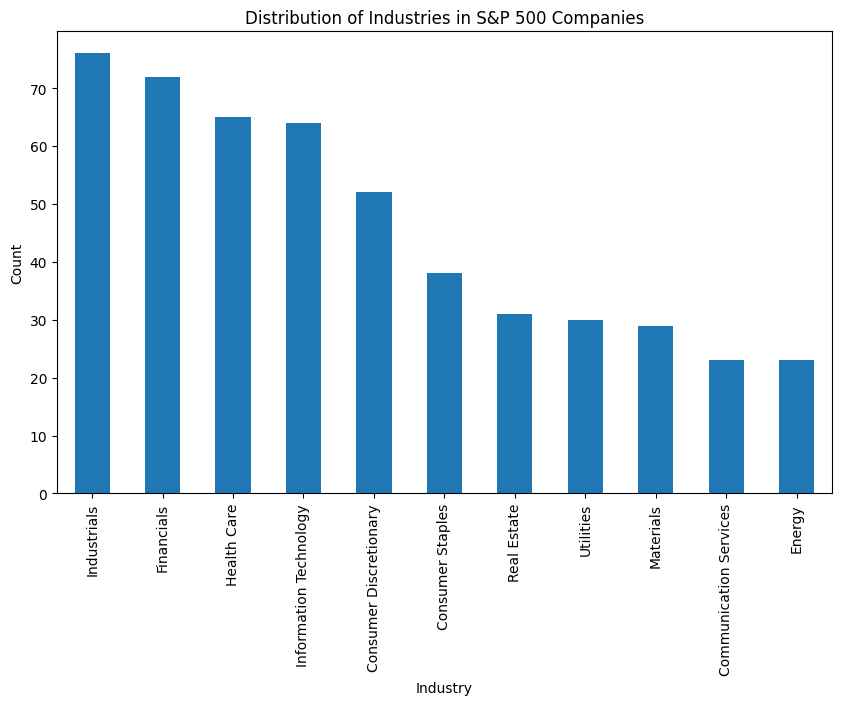

In [66]:
industry_data = data["Industry"]

industry_counts = industry_data.value_counts()

plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar')
plt.title("Distribution of Industries in S&P 500 Companies")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Another thing that caught my attention was the month of addition of each company to the S&P 500 list, as there is only 12 months. I wanted to check if there was a specific month that companies were more added on to the list than others.

<ipython-input-74-be2113fc6f13>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("s&p_500_companies.csv", error_bad_lines=False)


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Number of Companies Added by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Companies Added')

([<matplotlib.axis.XTick at 0x78fd1774c4f0>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

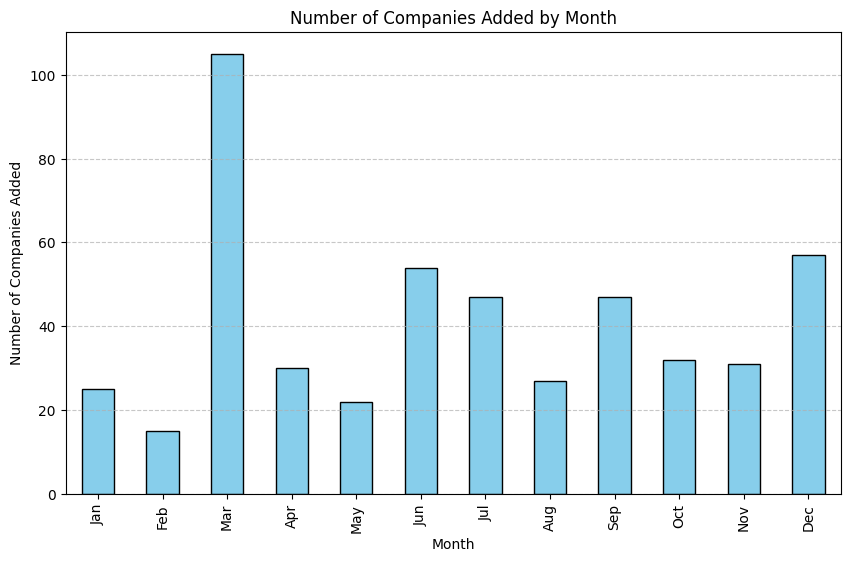

In [74]:
try:
    data = pd.read_csv("s&p_500_companies.csv", error_bad_lines=False)
except pd.errors.ParserError as e:
    print(f"Error parsing CSV: {e}")
    data = None

if data is not None:

    data["Date Added"] = pd.to_datetime(data["Date Added"], errors="coerce")
    data["Year"] = data["Date Added"].dt.year
    data["Month"] = data["Date Added"].dt.month

    data = data.dropna(subset=["Date Added"])

    monthly_counts = data["Month"].value_counts().sort_index()


    plt.figure(figsize=(10, 6))
    monthly_counts.plot(kind='bar', edgecolor='k', color='skyblue')
    plt.title("Number of Companies Added by Month")
    plt.xlabel("Month")
    plt.ylabel("Number of Companies Added")
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)


    plt.show()